In [1]:
import sys
sys.path.append("../src/")
from data import train_and_testloader_from_pc, dataloader_from_pc
from model import AEDist
import numpy as np
import torch
import phate
from heatgeo.embedding import HeatGeo
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
from scipy.spatial import procrustes
import scanpy as sc
import scprep
import matplotlib.pyplot as plt
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint
import wandb
import hydra
import os
from omegaconf import DictConfig, OmegaConf
import wandb
from hydra import initialize, compose
import pickle

In [2]:
adata = sc.read('../data/eb_hv.h5ad', backed='r')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
phate_operator = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate = phate_operator.fit_transform(adata.obsm['X_pca'])

Calculating PHATE...
  Running PHATE on 16821 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 18.02 seconds.
    Calculating affinities...
    Calculated affinities in 19.64 seconds.
  Calculated graph and diffusion operator in 37.84 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.21 seconds.
    Calculating KMeans...
    Calculated KMeans in 14.57 seconds.
  Calculated landmark operator in 20.56 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.83 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.60 seconds.
Calculated PHATE in 65.85 seconds.


<Axes: xlabel='PHATE HVG PCA1', ylabel='PHATE HVG PCA2'>

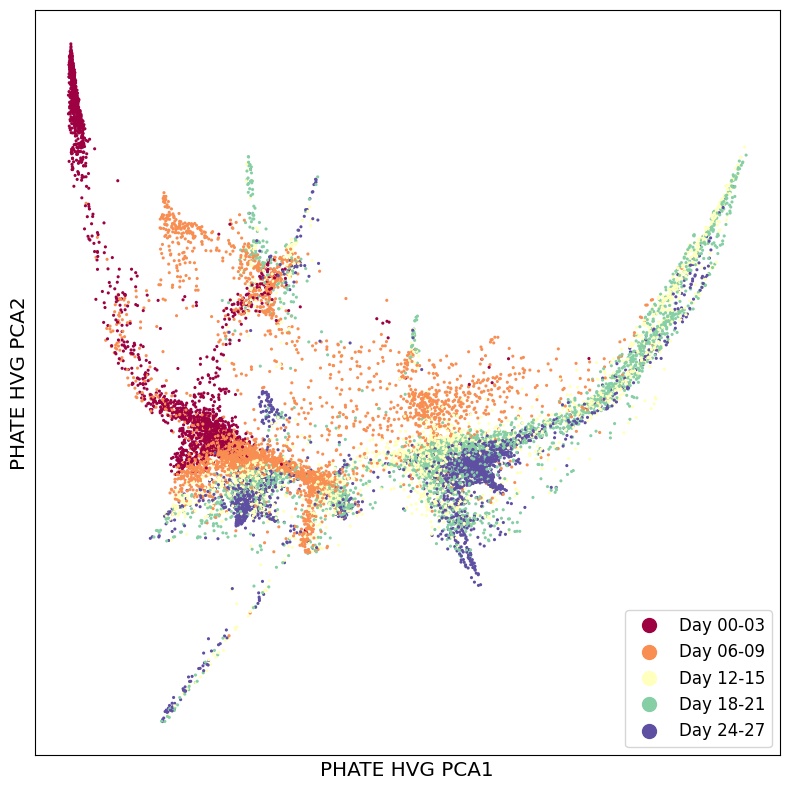

In [5]:
scprep.plot.scatter2d(Y_phate, c=adata.obs['sample_labels'], figsize=(8,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE HVG PCA")

In [6]:
np.save('../data/eb_hv_pca_all.npy', adata.obsm['X_pca'])

In [7]:
np.save('../data/eb_hv_pca_all_phate.npy', Y_phate)